In [2]:
import numpy as np
from numpy import matrix
from numpy.linalg import det, eig, inv, svd

## Eigendecomposition

令 A 是一个 N×N 的方阵，且有 **N 个线性无关的特征向量** ${\displaystyle q_{i}\,\,(i=1,\dots ,N)}$ 。这样， A 可以被分解为

${\displaystyle \mathbf {A} =\mathbf {Q} \mathbf {\Lambda } \mathbf {Q} ^{-1}}$
其中 Q 是N×N方阵，且其第 i列为 A 的特征向量 ${\displaystyle q_{i}}$ 。 Λ 是对角矩阵，其对角线上的元素为对应的特征值，也即 ${\displaystyle \Lambda _{ii}=\lambda _{i}}$ 。这里需要注意**只有可对角化矩阵**才可以作特征分解。比如 ${\displaystyle {\begin{bmatrix}1&1\\0&1\\\end{bmatrix}}}$ 不能被对角化，也就不能特征分解。

一般来说，特征向量 ${\displaystyle q_{i}\,\,(i=1,\dots ,N)}$ 一般被单位化（但这不是必须的）。未被单位化的特征向量组 ${\displaystyle v_{i}\,\,(i=1,\dots ,N),}$, 也可以作为 Q 的列向量。

In [3]:
np.random.seed(42)
A = np.random.randint(100, size=(3, 3))
A

array([[51, 92, 14],
       [71, 60, 20],
       [82, 86, 74]])

In [4]:
w, v = eig(A)
w

array([167.49689925, -24.92789049,  42.43099124])

In [5]:
v.astype('float16') # Each column is an eigenvector. Already been standarized.

array([[-0.4387, -0.775 , -0.2405],
       [-0.436 ,  0.6245, -0.1241],
       [-0.7856,  0.0995,  0.963 ]], dtype=float16)

In [6]:
sigma = np.eye(3)*w
sigma.astype('float16')

array([[167.5 ,  -0.  ,   0.  ],
       [  0.  , -24.92,   0.  ],
       [  0.  ,  -0.  ,  42.44]], dtype=float16)

In [7]:
matrix(v) * matrix(sigma) * matrix(inv(v)) # This is Eigendecomposition

matrix([[51., 92., 14.],
        [71., 60., 20.],
        [82., 86., 74.]])

In [8]:
(matrix(v.T) * matrix(v)).astype('float16') # Try if the eigenvectors are orthogonal, and they aren't

matrix([[ 1.     , -0.01044, -0.5967 ],
        [-0.01044,  1.     ,  0.2046 ],
        [-0.5967 ,  0.2046 ,  1.     ]], dtype=float16)

In [9]:
(matrix(v) * matrix(sigma) * matrix(v.T)).astype('float16') # v.T != inv(V), because they are not orthogonal.

matrix([[ 19.73,  45.38,  49.84],
        [ 45.38,  22.77,  50.75],
        [ 49.84,  50.75, 142.5 ]], dtype=float16)

### Let's try a symmetrical matrix.

任意的 N×N 实对称矩阵**都有 N 个线性无关的特征向量**。并且这些特征向量都可以**正交单位化**而得到一组正交且模为 1 的向量。故实对称矩阵 A 可被分解成

${\displaystyle \mathbf {A} =\mathbf {Q} \mathbf {\Lambda } \mathbf {Q} ^{T}}$

其中 Q 为 正交矩阵， Λ 为实对角矩阵。

In [10]:
B = np.array([[51, 92, 14], [92, 60, 20], [14, 20, 74]])
B

array([[51, 92, 14],
       [92, 60, 20],
       [14, 20, 74]])

In [11]:
w, v = eig(B)
w

array([-36.73410079, 154.82498547,  66.90911532])

In [12]:
v.astype('float16')

array([[ 0.7207 , -0.6567 , -0.2219 ],
       [-0.6924 , -0.6978 , -0.1841 ],
       [ 0.03394, -0.2864 ,  0.9575 ]], dtype=float16)

In [13]:
sigma = np.eye(3) * w
sigma.astype('float16')

array([[-36.72,   0.  ,   0.  ],
       [ -0.  , 154.9 ,   0.  ],
       [ -0.  ,   0.  ,  66.94]], dtype=float16)

In [14]:
matrix(v) * matrix(sigma) * matrix(inv(v))

matrix([[51., 92., 14.],
        [92., 60., 20.],
        [14., 20., 74.]])

In [15]:
(matrix(v.T) * matrix(v)).astype('float16') # Eigenvectors are orthogonal

matrix([[ 1., -0., -0.],
        [-0.,  1.,  0.],
        [-0.,  0.,  1.]], dtype=float16)

In [16]:
matrix(v) * matrix(sigma) * matrix(v.T) # v.T = inv(v)

matrix([[51., 92., 14.],
        [92., 60., 20.],
        [14., 20., 74.]])

### diagonalization of a symmetric matrix

In [17]:
(matrix(v.T) * matrix(B) * matrix(v)).astype('float16') # 对角化的矩阵为特征值的对角线矩阵.

matrix([[-36.72,  -0.  ,  -0.  ],
        [ -0.  , 154.9 ,   0.  ],
        [ -0.  ,   0.  ,  66.94]], dtype=float16)

以上的式子的含义是在矩阵 $B$ 的特征向量作为基张成的空间中观察 $B$ 这个变换，显然它将是一个简单的拉伸变换，各个轴方向拉伸比例为该特征向量对应的特征值.

讨论：

当我们想要知道 $S$ 空间中某变换 $A$ 在另一空间 $S'$ 中的表示时，我们可以先假设 $S'$ 空间中的一个向量 $v' = {\begin{bmatrix}x'\\y'\\\end{bmatrix}}$.

首先求取 $v'$ 在 $S$ 空间中的表示：$Qv'$，其中 $Q$ 是 $S'$ 空间的基向量在 $S$ 空间中的表示（基向量按列排布）.

之后再左乘 $A$： $AQv'$，表示在 $S$ 空间中进行变换.

最后再 $Q^{-1}AQv'$，将在 $S$ 空间中进行变换后的 $v'$ 换回 $S'$ 空间中的表示.

对比变换前的 $v'$，在变换后成为了 $Q^{-1}AQv'$，可知 $A' = Q^{-1}AQ$

也可以从另一面思考（我更喜欢这种），先假设 $S$ 空间中的一个向量 $v = {\begin{bmatrix}x\\y\\\end{bmatrix}}$

分别求取变换前后的 v 在 $S'$ 中的表示：$Q^{-1}v$ 以及 $Q^{-1}Av$

现在求 $S'$ 中的变换 $Q'$，使得 $Q'Q^{-1}v = Q^{-1}Av$

那么有 $Q'Q^{-1} = Q^{-1}A$，两边同时右乘 $Q$：$Q' = Q^{-1}AQ$

看这两种情况：

1. 当 $v$ 是 $S'$ 中的表示，要换到 $S$ 中的表示时，需左乘 $S'$ 基向量（按列排布）在 $S$ 中的表示 $Q$（把 $v$ 看成是基向量的线性组合）.
2. 当 $v$ 是 $S$ 中的表示，要换到 $S'$ 中的表示时，需左乘上述 $Q$ 的逆 $Q^{-1}$，而当其基向量相互正交时，$Q^{-1} = Q.T$，因此左乘 $Q.T$ 即可. 这个几何意义也是很明显的：相当于求 $S'$ 的基向量（此时按行排布）和 $v$ 的内积，而内积即为投影. 当不正交时，左乘 $Q.T$ 是徒劳的，因为投影是垂直投影.

有了以上的知识储备，可以解决下面这个问题：

如何快速求解：${\begin{bmatrix}1&2\\2&1\\\end{bmatrix}}^N$

方案一：

令 $A = {\begin{bmatrix}1&2\\2&1\\\end{bmatrix}}$，假设 $S$ 空间中的向量 $v$，则 $v$ 经过上述变换变为 ${\begin{bmatrix}1&2\\2&1\\\end{bmatrix}}^Nv$.

现在我们把 $A$ 和 $v$ 都变为 $S'$ 中的表示 $A'$ 和 $v'$，$S'$ 的基为 $A$ 经标准化的特征向量: $Q = {\begin{bmatrix}\frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\\\end{bmatrix}}$

那么 $A' = Q^{-1}AQ = {\begin{bmatrix}3&0\\0&-1\\\end{bmatrix}}, v' = Q^{-1}v$

从 $S'$ 的视角来看这个变换：$(A')^Nv' = {\begin{bmatrix}3&0\\0&-1\\\end{bmatrix}}^NQ^{-1}v$

最后再把最终的结果向量从 $S'$ 视角切换回 $S$ 视角:

$Q{\begin{bmatrix}3^N&0\\0&(-1)^N\\\end{bmatrix}}Q^{-1}v$

观察可知 ${\begin{bmatrix}1&2\\2&1\\\end{bmatrix}}^N = Q{\begin{bmatrix}3^N&0\\0&(-1)^N\\\end{bmatrix}}Q^{-1}$


方案二：

当然我们也可以反着思考：

$A^N = Q(Q^{-1}AQ)^NQ^{-1}$，我们只需要找到让 $(Q^{-1}AQ)^N$ 方便计算的方法即可，显然让其对角化即可，而此时 $Q$ 正是 $A$ 的标准化特征向量按列排成的矩阵.

##  SVD

SVD也是对矩阵进行分解，但是和特征分解不同，SVD并不要求要分解的矩阵为方阵。假设我们的矩阵A是一个m×n的矩阵，那么我们定义矩阵A的SVD为：

$A=UΣV^T$

其中U是一个m×m的矩阵，Σ是一个m×n的矩阵，除了主对角线上的元素以外全为0，主对角线上的每个元素都称为奇异值，V是一个n×n的矩阵。U和V都是酉矩阵，即满足 $U^TU=I,V^TV=I$。

In [18]:
C = np.array([[0, 1],[1, 1],[1, 0]])
C

array([[0, 1],
       [1, 1],
       [1, 0]])

In [19]:
U, s, V = svd(C)
U.astype('float16')

array([[-0.4082,  0.707 ,  0.577 ],
       [-0.8164,  0.    , -0.577 ],
       [-0.4082, -0.707 ,  0.577 ]], dtype=float16)

In [20]:
s.astype('float16')

array([1.732, 1.   ], dtype=float16)

In [21]:
V.astype('float16')

array([[-0.707, -0.707],
       [-0.707,  0.707]], dtype=float16)

其中 U，V 都是 酉矩阵：

In [22]:
(matrix(U.T) * matrix(U)).astype('float16')

matrix([[ 1.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0., -0.,  1.]], dtype=float16)

In [23]:
(matrix(V.T) * matrix(V)).astype('float16')

matrix([[ 1., -0.],
        [-0.,  1.]], dtype=float16)

### SVD by hand

In [24]:
C

array([[0, 1],
       [1, 1],
       [1, 0]])

现在我们知道 $C = UΣV^T$, 那么 $C^T = VΣU^T$

$CC^T = UΣV^TVΣU^T = UΣ^2U^T$，这是对 $CC^T$ 的特征值分解，可见 $U$ 就是 $CC^T$ 的特征向量按列张成的矩阵, 而 $Σ^2$ 就是 $CC^T$ 的特征值组成的对角矩阵. 也就是说 $CC^T$ 的特征值是 $C$ 的奇异值的平方.

$C^TC = VΣU^TUΣV^T = VΣ^2V^T$，这是对 $C^TC$ 的特征值分解，可见 $V$ 就是 $C^TC$ 的特征向量按列张成的矩阵.

In [25]:
D = matrix(C) * matrix(C.T)
D

matrix([[1, 1, 0],
        [1, 2, 1],
        [0, 1, 1]])

In [26]:
E = matrix(C.T) * matrix(C) # This is a symmetric matrix
E

matrix([[2, 1],
        [1, 2]])

接下来对 $CC^T$ 和 $C^TC$ 进行特征值分解

In [27]:
w1, v1 = eig(D) # w1 shape: 3, v1 shape: (3,3)
print(w1.astype('float16'))
v1.astype('float16')

[ 3.  1. -0.]


matrix([[-0.4082,  0.707 ,  0.577 ],
        [-0.8164,  0.    , -0.577 ],
        [-0.4082, -0.707 ,  0.577 ]], dtype=float16)

In [28]:
w2, v2 = eig(E)
print(w2)
v2.astype('float16')

[3. 1.]


matrix([[ 0.707, -0.707],
        [ 0.707,  0.707]], dtype=float16)

In [29]:
U = matrix(v1).astype('float16') # 跟自动分解出来的结果一样
U

matrix([[-0.4082,  0.707 ,  0.577 ],
        [-0.8164,  0.    , -0.577 ],
        [-0.4082, -0.707 ,  0.577 ]], dtype=float16)

In [30]:
sigma = np.vstack((np.eye(2),np.array([0, 0]))) * np.sqrt(w2)
sigma

array([[1.73205081, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

In [31]:
V = matrix(v2).astype('float16') # 跟之前分解出来的结果不一样
V[:, 0] *= -1 # 改成跟之前一样，否则下面的结果也不同（为什么会这样？手动分解的时候应该怎么考虑？）
V

matrix([[-0.707, -0.707],
        [-0.707,  0.707]], dtype=float16)

In [32]:
(U * sigma * V.T).astype('float16')

matrix([[-1.9e-06,  1.0e+00],
        [ 1.0e+00,  1.0e+00],
        [ 1.0e+00, -1.9e-06]], dtype=float16)

## Compare Matrix's Eigenvalue and Singular Value

首先尝试对称矩阵：

In [41]:
B = np.array([[51, 92, 14], [92, 60, 20], [14, 20, 74]])
B

array([[51, 92, 14],
       [92, 60, 20],
       [14, 20, 74]])

In [42]:
w, v = eig(B)
w

array([-36.73410079, 154.82498547,  66.90911532])

In [43]:
U, s, V = svd(B)
s

array([154.82498547,  66.90911532,  36.73410079])

可以看到 对称矩阵 的特征值和奇异值的绝对值是相等的. 为什么会这样？

我们先来考察一下对称矩阵 B 的性质：$B^2$ 的特征值和 B 的特征值什么关系？

In [44]:
BB = matrix(B) * matrix(B) # 依然是对称矩阵：(B*B)^T = B^T * B^T = B*B
BB

matrix([[11261, 10492,  3590],
        [10492, 12464,  3968],
        [ 3590,  3968,  6072]])

In [45]:
w, v = eig(BB) # 发现 BB 的特征值是 B 的特征值的平方
np.sqrt(w)

array([154.82498547,  36.73410079,  66.90911532])

从几何上来解释：以二维空间为例，对称矩阵相当于沿一三象限对角线拉伸空间，两次相同方向的拉伸形成伸展倍数是单次伸展倍数的平方.

接下来，因为有：$B^2 = BB^T$

- $B^2$ 的特征值等同于$BB^T$ 的特征值，是 $B$ 的奇异值的平方，
- $B^2$ 的特征值是 $B$ 的特征值的平方

则 $B$ 的特征值和 $B$ 的奇异值绝对值相等.

接下来尝试一下非对称矩阵：

In [38]:
C = np.random.randint(100, size=(3,3))
C

array([[74, 87, 99],
       [23,  2, 21],
       [52,  1, 87]])

In [39]:
w, v = eig(C)
w

array([162.65639171, -21.41336671,  21.75697499])

In [40]:
U, s, V = svd(C)
s

array([177.20445649,  51.21382714,   8.35012025])

这回就不一样了. 不过在尝试过程中发现，就算矩阵接近于对称，特征值和奇异值也接近相等.

## PCA

要用 PCA 降维，需要找到样本协方差矩阵 $X^TX$ 的最大的d个特征向量，然后用这最大的 d 个特征向量张成的矩阵来做低维投影降维。可以看出，在这个过程中需要先求出协方差矩阵 $X^TX$，当样本数多样本特征数也多的时候，这个计算量是很大的。

SVD 也可以得到协方差矩阵 $X^TX$ 最大的 d 个特征向量张成的矩阵: 经过以前的分析，$X^TX$ 的特征向量即为 $X$ 的右奇异矩阵.

所以 SVD 有个好处，它可以不求先求出协方差矩阵 $X^TX$，也能求出其特征向量.

## Try With an Image 

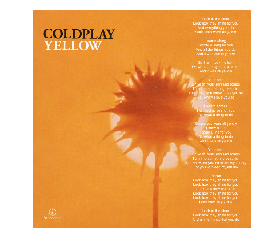

In [4]:
img_dir = './img/yellow.jpg'
import matplotlib.pyplot as plt

img = plt.imread(img_dir)
plt.axis('off')
plt.imshow(img)
None

In [6]:
img.shape

(600, 600, 3)

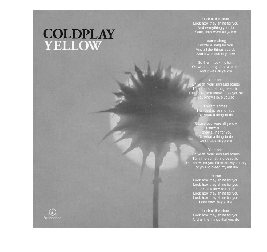

In [10]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img)
plt.axis('off')
plt.imshow(img_gray, cmap='gray')

In [30]:
import numpy as np
from numpy import matrix

w, v = np.linalg.eig(matrix(img_gray.T) * matrix(img_gray)) # 这里相当于把图像看成了 600 个向量，每一列为一个向量（直觉不太对）
img_pca = np.dot(v[:, np.argsort(w)[-1:-301:-1]].T, img_gray) # 把 600 维压缩到 300 维
img_pca.shape

(300, 600)

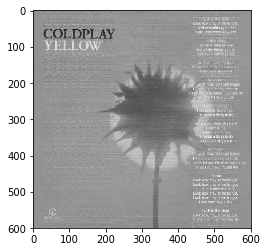

In [33]:
plt.imshow(np.dot(v[:, np.argsort(w)[-1:-301:-1]], img_pca), cmap='gray') # 这一步还不太理解，只知道维度恢复了
None

In [42]:
np.dot(v.T, v).astype('float16') # v 是 酉矩阵，v.T = inv(v)

matrix([[ 1.e+00, -0.e+00,  0.e+00, ..., -0.e+00,  0.e+00, -0.e+00],
        [-0.e+00,  1.e+00, -0.e+00, ..., -0.e+00,  0.e+00, -0.e+00],
        [ 0.e+00, -0.e+00,  1.e+00, ...,  0.e+00,  0.e+00,  0.e+00],
        ...,
        [-0.e+00, -0.e+00,  0.e+00, ...,  1.e+00, -6.e-08, -6.e-08],
        [ 0.e+00,  0.e+00,  0.e+00, ..., -6.e-08,  1.e+00, -1.e-07],
        [-0.e+00, -0.e+00,  0.e+00, ..., -6.e-08, -1.e-07,  1.e+00]],
       dtype=float16)

In [37]:
np.dot(v, v.T).astype('float16') # 因此两者都是 I

matrix([[ 1.e+00,  0.e+00, -0.e+00, ..., -0.e+00, -0.e+00, -0.e+00],
        [ 0.e+00,  1.e+00,  6.e-08, ...,  0.e+00,  0.e+00,  0.e+00],
        [-0.e+00,  6.e-08,  1.e+00, ..., -0.e+00,  0.e+00, -0.e+00],
        ...,
        [-0.e+00,  0.e+00, -0.e+00, ...,  1.e+00,  0.e+00, -0.e+00],
        [-0.e+00,  0.e+00,  0.e+00, ...,  0.e+00,  1.e+00, -0.e+00],
        [-0.e+00,  0.e+00, -0.e+00, ..., -0.e+00, -0.e+00,  1.e+00]],
       dtype=float16)

In [43]:
np.dot(v[:, np.argsort(w)[-1:-301:-1]], v[:, np.argsort(w)[-1:-301:-1]].T).astype('float16') # 但是这个代表什么意思呢？

matrix([[4.3018e-01, 1.5845e-01, 3.7445e-02, ..., 3.1219e-02, 1.1238e-02,
         6.6032e-03],
        [1.5845e-01, 2.7539e-01, 1.5918e-01, ..., 1.3008e-02, 9.3842e-03,
         3.1013e-03],
        [3.7445e-02, 1.5918e-01, 2.4243e-01, ..., 2.1118e-02, 3.4118e-04,
         1.7242e-03],
        ...,
        [3.1219e-02, 1.3008e-02, 2.1118e-02, ..., 2.2388e-01, 1.1176e-01,
         8.0383e-02],
        [1.1238e-02, 9.3842e-03, 3.4118e-04, ..., 1.1176e-01, 2.1619e-01,
         1.4722e-01],
        [6.6032e-03, 3.1013e-03, 1.7242e-03, ..., 8.0383e-02, 1.4722e-01,
         3.0469e-01]], dtype=float16)